Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  221 non-null    object 
 1   Period            221 non-null    float64
 2   Data_value        221 non-null    float64
 3   Suppressed        0 non-null      float64
 4   STATUS            221 non-null    object 
 5   UNITS             221 non-null    object 
 6   Magnitude         221 non-null    float64
 7   Subject           221 non-null    object 
 8   Group             221 non-null    object 
 9   Series_title_1    221 non-null    object 
 10  Series_title_2    221 non-null    object 
 11  Series_title_3    221 non-null    object 
 12  Series_title_4    221 non-null    object 
 13  Series_title_5    0 non-null      float64
dtypes: float64(5), object(9)
memory usage: 131.5+ KB
None

First Five Rows of the Dataset:
  Series_ref

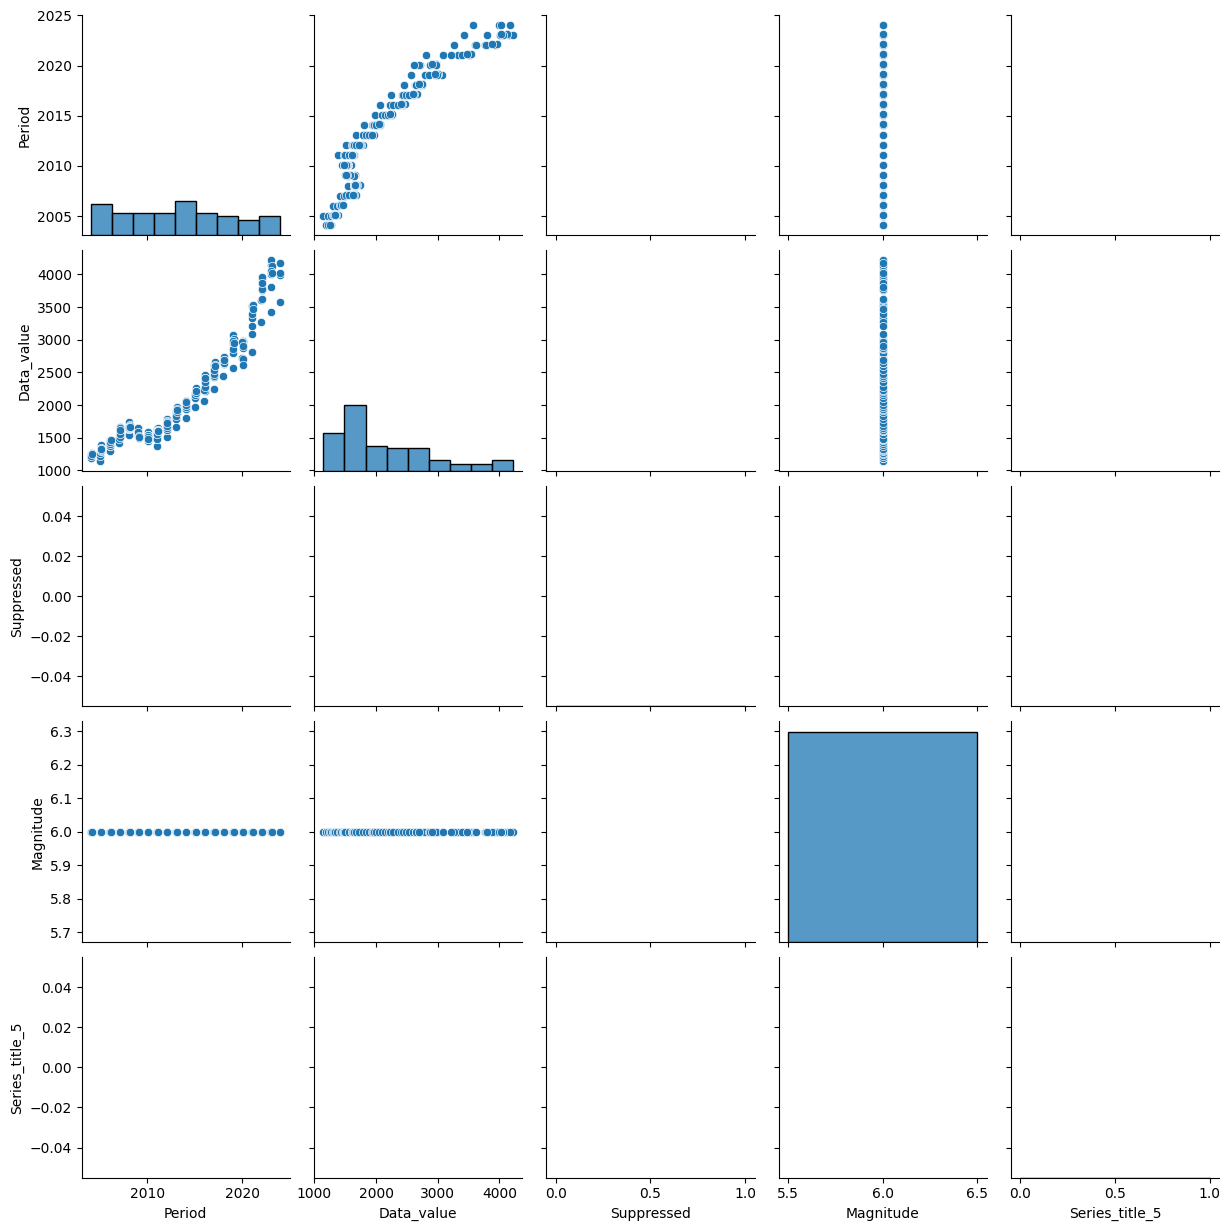


Heatmap of the Correlation Matrix:


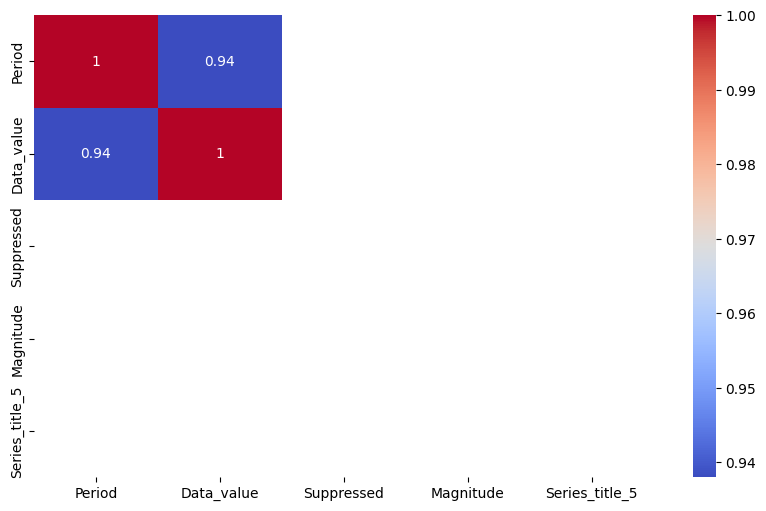


Distribution Plots for numerical columns:


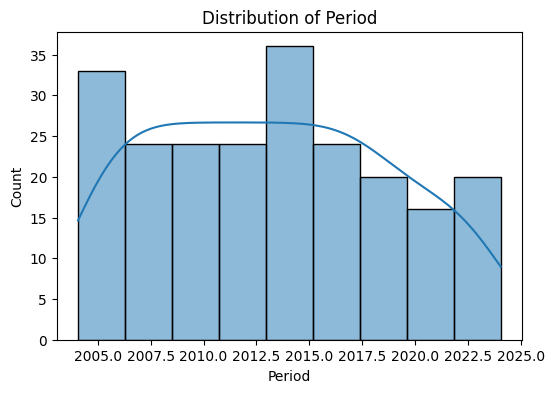

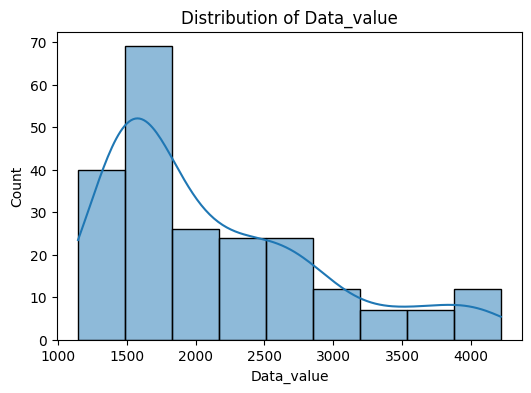

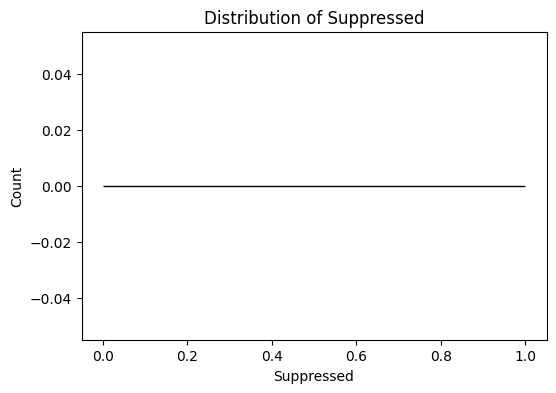

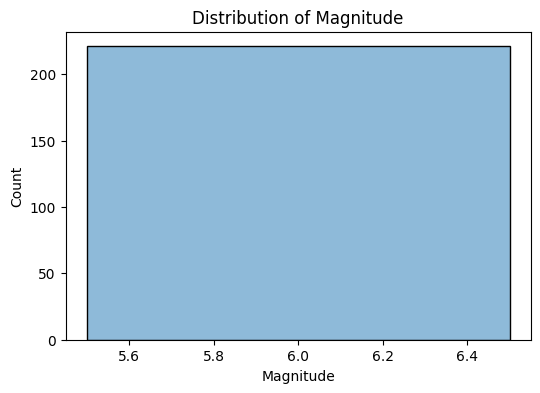

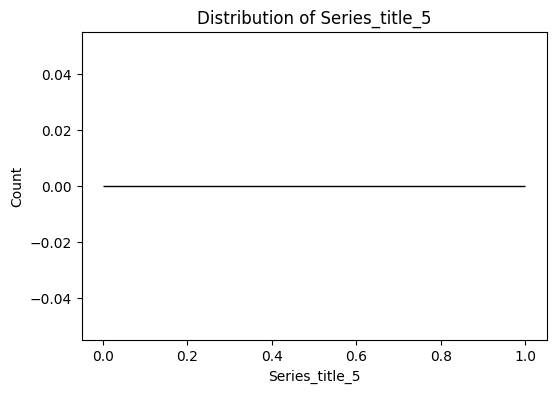


Countplots for categorical columns:


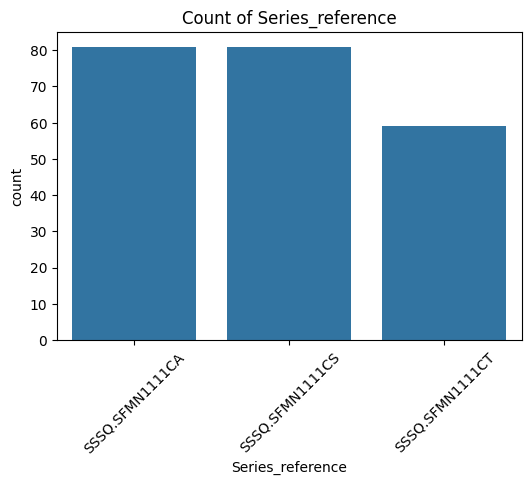

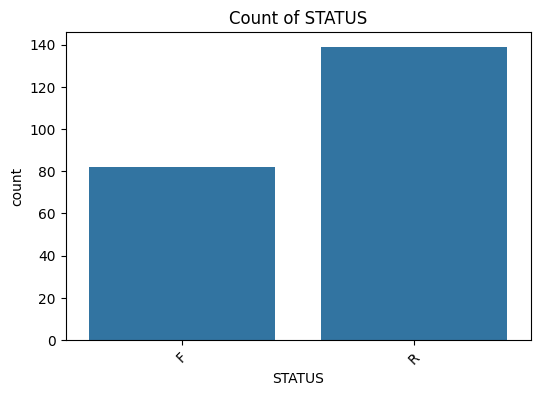

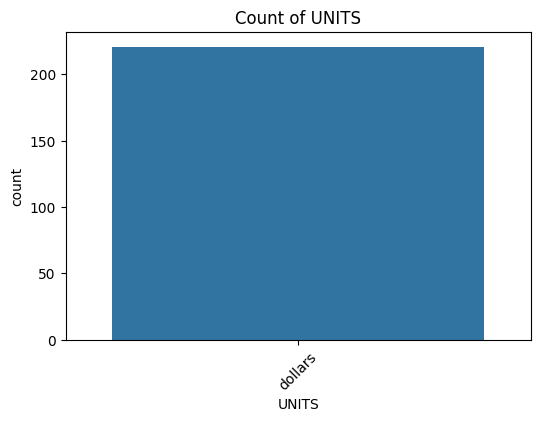

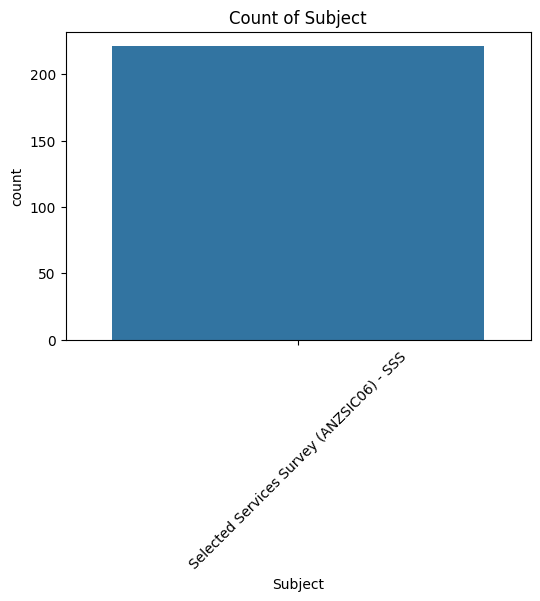

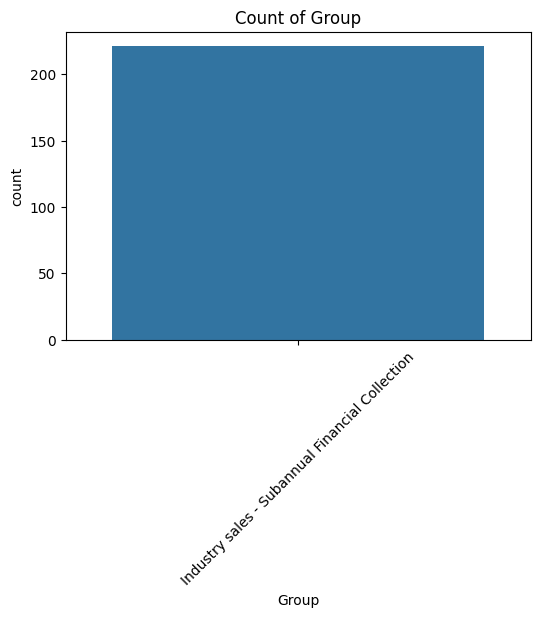

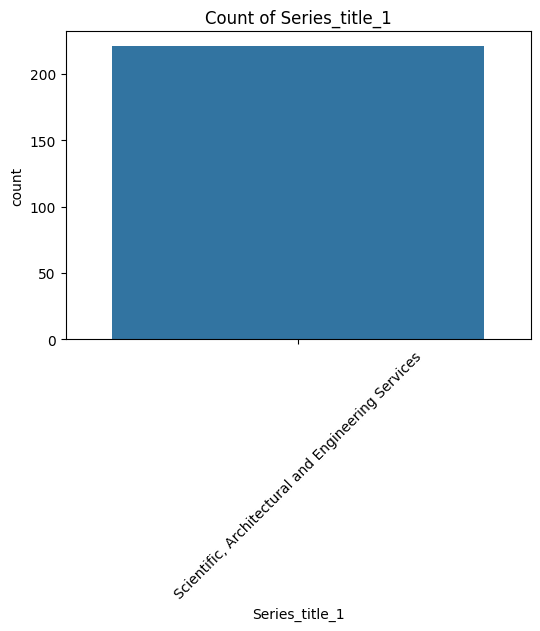

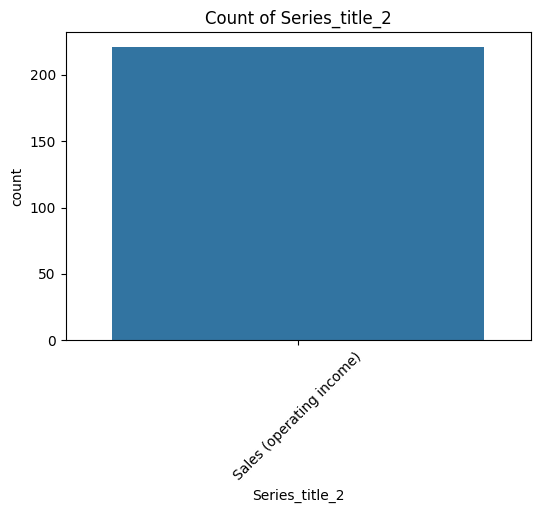

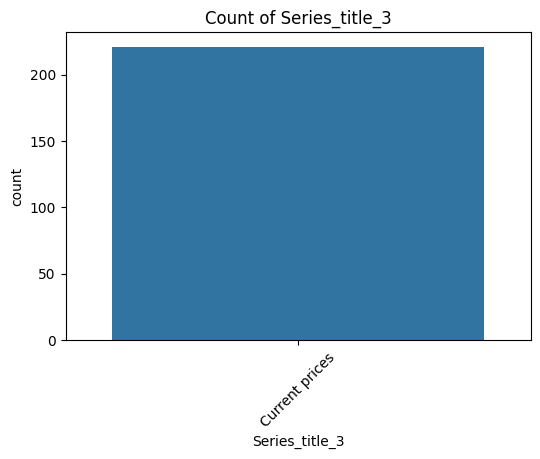

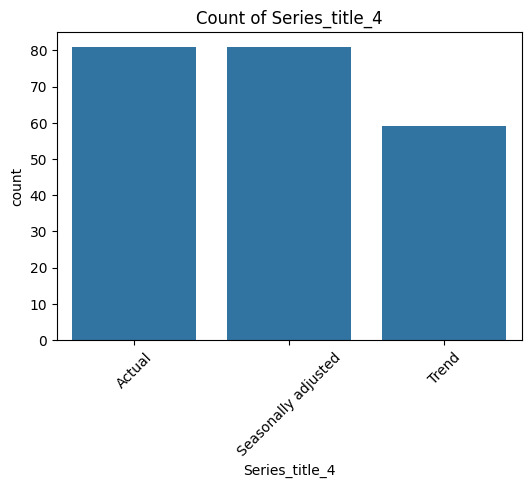


Handling missing data (Dropping rows with missing values):
Cleaned dataset shape: (0, 14)
Cleaned data exported to 'cleaned_data.csv'


In [5]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the dataset
def import_data(file_path):
    try:
        data = pd.read_csv('data set.csv')
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

# Step 2: Exploratory Data Analysis (EDA)
def eda(data):
    # 2.1: Basic Dataset Information
    print("Basic Information about the Dataset:")
    print(data.info())  # Get information about columns and data types

    # 2.2: First few rows
    print("\nFirst Five Rows of the Dataset:")
    print(data.head())

    # 2.3: Check for Missing Values
    print("\nMissing Values in the Dataset:")
    print(data.isnull().sum())

    # 2.4: Summary Statistics
    print("\nSummary Statistics of the Dataset:")
    print(data.describe())

    # 2.5: Distribution of Categorical Variables
    print("\nCategorical Variables Value Counts:")
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(data[col].value_counts())

    # 2.6: Correlation between Numerical Variables
    print("\nCorrelation Matrix of Numerical Variables:")
    correlation_matrix = data.corr(numeric_only=True)  # Use numeric_only to avoid errors
    print(correlation_matrix)

    # 2.7: Checking for duplicates
    print("\nNumber of duplicate rows in the dataset:")
    print(data.duplicated().sum())

# Step 3: Visualization for deeper insights
def visualize_data(data):
    # 3.1: Pairplot of numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64'])
    print("\nPairplot for numerical columns:")
    if len(numerical_cols.columns) > 1:
        sns.pairplot(data=numerical_cols)
        plt.show()
    else:
        print("Not enough numerical columns for a pairplot.")

    # 3.2: Heatmap of the Correlation Matrix
    print("\nHeatmap of the Correlation Matrix:")
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.show()

    # 3.3: Distribution Plots for numerical columns
    print("\nDistribution Plots for numerical columns:")
    for col in numerical_cols.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # 3.4: Countplot for categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    print("\nCountplots for categorical columns:")
    for col in categorical_cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=data[col])
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.show()

# Step 4: Handling Missing Data
def handle_missing_data(data):
    print("\nHandling missing data (Dropping rows with missing values):")
    clean_data = data.dropna()
    print(f"Cleaned dataset shape: {clean_data.shape}")
    return clean_data

# Example Usage
file_path = 'your_lab_4_dataset.csv'  # Replace with your actual file path

# Importing the dataset
data = import_data(file_path)

# Performing Exploratory Data Analysis
if data is not None:
    eda(data)
    visualize_data(data)

    # Handling Missing Data
    clean_data = handle_missing_data(data)

    # Export the cleaned data
    clean_data.to_csv('cleaned_data.csv', index=False)
    print("Cleaned data exported to 'cleaned_data.csv'")
